# LIBRERIE

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import itertools
from pyvis.network import Network
import os
import shutil
import collections
import random

# DATASET

In [7]:
dataset = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/DATASET/CosciaRios2012_DataBase.csv') #lettura del dataset
dataset.drop('Code', axis=1, inplace=True) #rimuoviamo la collona dove sono presenti i codici "provinciali"
dataset = dataset.groupby(['State','Year']).sum() #sommiamo le nostre istanze in base a Stato e Anno
dataset.to_csv('Mexican_Drug_Cartels_dta.csv') #salviamo il dataset

#cambiamo la posizione del file creato
source = r"/Users/emanuele/Desktop/SNA/PROGETTO/Mexican_Drug_Cartels_dta.csv"
destination = r"/Users/emanuele/Desktop/SNA/PROGETTO/DATASET/Mexican_Drug_Cartels_dta.csv"
shutil.move(source, destination)

'/Users/emanuele/Desktop/SNA/PROGETTO/DATASET/Mexican_Drug_Cartels_dta.csv'

In [8]:
dataset = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/DATASET/Mexican_Drug_Cartels_dta.csv')
#dividiamo il nostro datastet in due decadi 
dta_9000 = dataset[dataset.Year < 2000] #1990-1999
dta_0010 = dataset[dataset.Year >= 2000 ] #2000-2010

# FUNZIONI

In [9]:
def Edges_Generator(dataset, name_txt, Qcartelli, stateL=False, yearL=False, yearXstate=False, cartelL=False,
                    link_state_year=False):
    #permette la creazione di edges partendo dal dataset di partenza

    #esegue un check per vedere crearli su tutte le famiglie o su una in particolare
    if Qcartelli == 'ALL':
        cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
                    'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']
    else:
        cartelli = []
        cartelli.append(Qcartelli)

    res_list = []
    
    for state in dataset.State.unique(): #creiuamo un subset per ogni stato in maniera ricorsiva
        sub1 = dataset[dataset.State == state]

        for year in sub1.Year: #creiuamo un subset per ogni anno in maniera ricorsiva
            sub2 = sub1[sub1.Year == year]
            
            for single in cartelli:
                value = sub2[single].iloc[0] #troviamo il numero di volte che il cartello è apparso
                list = []

                if value > 0 : #eseguiamo un controllo per sapere se creare o no il collegamento
                    #in base alle impostazioni decise prendiamo PARTENZA(A), ARRIVO(B) e WEIGHT(W)
                    if yearXstate == True:
                        year_ = str(year)
                        _state = str(state)
                        year_state = str(year_ + '_' + _state)

                    if stateL == True:
                        list.append(state)
                    
                    if yearL == True:
                        list.append(year)
                    elif yearXstate == True:
                        list.append(year_state)
                    
                    if Qcartelli == 'ALL':
                        if cartelL == True:
                            list.append(single)
                    else:
                        if cartelL == True:
                            list.append(Qcartelli)
                    
                    if link_state_year == True:
                        list.append(1)
                    else:
                        list.append(value)
                    res_list.append(list)

    #creiamo il file.txt con il nome deciso nelle impostazioni                    
    name_file = str(name_txt + ".txt")
    file = open(name_file, "w+")

    file.write('A'+',')
    file.write('B'+',')
    file.write('Weight'+'\n')

    for list in res_list:
        time = 0
        for element in list:
            time = time + 1
            e = str(element)
            file.write(e)
            if time < 3:
                file.write(',')
            else:
                file.write('\n')

    file.close()

    return(file)

#----------------------------------------------------------------------------------------#

def Edges_Generator_for_Cartel(name_cartel, cartel_sigla, years_9000=False, years_0010=False):

    if years_9000 == True: #svolgo operazioni per gli anni 1990 - 1999
        #assegno i nomi ai file tramite una concatenazione di stringhe
        name_txt_9000_yXc = 'year_'+str(name_cartel)+'_'+str(cartel_sigla)+'9000'
        name_txt_9000_sXy = 'state_year_'+str(name_cartel)+'_'+str(cartel_sigla)+'9000'
        name_csv_9000 = str(name_cartel)+'_'+'9000'+'.csv'

        #utilizzo la funzione creata in precesenza per generare gli edges
        Edges_Generator(dta_9000,name_txt_9000_yXc, name_cartel, yearL=True,cartelL=True)
        Edges_Generator(dta_9000,name_txt_9000_sXy, name_cartel, stateL=True, yearL=True,link_state_year=True)

        name_txt_9000_yXc = name_txt_9000_yXc + '.txt'
        name_txt_9000_sXy = name_txt_9000_sXy + '.txt'

        #creo i percorsi delle per leggeere i file.txt sopra creati
        percorso_cartella = '/Users/emanuele/Desktop/SNA/PROGETTO/'
        percorso_1 = str(percorso_cartella) + str(name_txt_9000_sXy)
        percorso_2 = str(percorso_cartella) + str(name_txt_9000_yXc)
        percorso_3 = str(percorso_cartella) + str(name_csv_9000)

        df_1 = pd.read_csv(str(percorso_1))
        df_2 = pd.read_csv(str(percorso_2))
        df_2 = df_2.groupby(['A','B']).sum() #effettuo una somma in base ad anno e cartello
        df_2.to_csv(name_csv_9000) 
        df_2 = pd.read_csv(percorso_3)
        df = pd.concat([df_1,df_2],ignore_index=True, sort=False) #unisco le due liste di edges
    
    elif years_0010 == True: #svolgo le stesse operazioni per gli anni fra 2000 e 2010
        name_txt_0010_yXc = 'year_'+str(name_cartel)+'_'+str(cartel_sigla)+'0010'
        name_txt_0010_sXy = 'state_year_'+str(name_cartel)+'_'+str(cartel_sigla)+'0010'
        name_csv_0010 = str(name_cartel)+'_'+'0010'+'.csv'

        Edges_Generator(dta_0010,name_txt_0010_yXc, name_cartel, yearL=True,cartelL=True)
        Edges_Generator(dta_0010,name_txt_0010_sXy, name_cartel, stateL=True, yearL=True,link_state_year=True)

        name_txt_0010_yXc = name_txt_0010_yXc + '.txt'
        name_txt_0010_sXy = name_txt_0010_sXy + '.txt'

        percorso_cartella = '/Users/emanuele/Desktop/SNA/PROGETTO/'
        percorso_1 = str(percorso_cartella) + str(name_txt_0010_sXy)
        percorso_2 = str(percorso_cartella) + str(name_txt_0010_yXc)
        percorso_3 = str(percorso_cartella) + str(name_csv_0010)

        df_1 = pd.read_csv(str(percorso_1))
        df_2 = pd.read_csv(str(percorso_2))
        df_2 = df_2.groupby(['A','B']).sum()
        df_2.to_csv(name_csv_0010)
        df_2 = pd.read_csv(percorso_3)
        df = pd.concat([df_1,df_2],ignore_index=True, sort=False) 

    return(df)

#----------------------------------------------------------------------------------------#

def Edges_Only_Cartel_Network_Start(dataset,name_txt):
    
    cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
                'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

    final_list = []
    for state in dataset.State.unique():
        sub1 = dataset[dataset.State == state]

        for year in sub1.Year:
            sub2 = sub1[sub1.Year == year]
            
            for single in cartelli:
                value = sub2[single].iloc[0]
                list = []
                if value > 0 :
                    list.append(state)
                    list.append(year)
                    list.append(single)
                    list.append(value)
                    final_list.append(list)
                    
    name_file = str(name_txt + ".txt")
    file = open(name_file, "w+")

    file.write('A'+',')
    file.write('Bridge'+',')
    file.write('B'+',')
    file.write('Weight'+'\n')

    for list in final_list:
        time = 0
        for element in list:
            time = time + 1
            e = str(element)
            file.write(e)
            if time < 4:
                file.write(',')
            else:
                file.write('\n')

    file.close() 

    return(file)

#----------------------------------------------------------------------------------------#

def Edges_Only_Cartel_Network_Final(dataset, name_txt, name_csv, year_selected):

    Edges_Only_Cartel_Network_Start(dataset,name_txt)

    name_file_txt = name_txt+'.txt'
    name_file_csv = name_csv+'.csv'
    percorso_cartella = '/Users/emanuele/Desktop/SNA/PROGETTO/'
    percorso1 = percorso_cartella + name_file_txt
    percorso2 = percorso_cartella + name_file_csv

    data =  pd.read_csv(percorso1)

    data = data[data.Bridge == year_selected]

    data_AB = data[['A','B','Weight']]
    data_AB = data_AB.groupby(['A','B']).sum()

    data_AB.to_csv(name_file_csv)

    df = pd.read_csv(percorso2)

    edges_list = []

    for state in df.A.unique():
        sub = df[df.A == state]
        
        if len(sub) > 1:
            list_cartels = []
            for cartel in sub.B:
                list_cartels.append(cartel)

            for v in itertools.combinations(list_cartels, 2):
                edges_list.append(v)
                
                
    new_df = pd.DataFrame(columns=['A','B'])
    new_df[['A','B']]=edges_list

    new_cols = ['A','B']
    new_df = new_df.reindex(new_df.columns.union(new_cols), axis=1) 

    return(new_df)

#----------------------------------------------------------------------------------------#

def Network_Cartels_Meeting_Generator(dataset,Graph,colore):
    
    cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
            'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']
    
    edges_cartels = dataset.values.tolist()

    for cartello in cartelli:
        name = str(cartello)
        Graph.add_node(name, color = colore)

    for i in range(len(edges_cartels)):
        edge = edges_cartels[i]
        add = -1

        for o in range(len(edge)):
            add = add + 1
            
            if add == 0:
                A = edge[add]
                
            elif add == 1:
                B = edge[add]
            elif add == 2:
                W = edge[add]

        Graph.add_edge(str(A), str(B) ,weight=int(W))
          
    return(Graph)   

#----------------------------------------------------------------------------------------#

def metrics(network):

    #conto degli edge/link della rete 
    link = network.number_of_edges()
    print('-> I link della rete sono:', link)

    #degree dei nodi
    print('\n-> Calcolo il degree di ogni singolo nodo della rete:')

    for node,degree in network.degree():
        print('il nodo',node,'ha degree:',degree)
    
    somma_degree = sum(dict(network.degree()).values())
    print('\nLa somma dei node degree è:',somma_degree)
    print('\nL\'average degree di questa network è:',somma_degree/(len(network)))
    
    #densità
    print('\n-> Densità della rete equivale a:',nx.density(network))

    #matrice di adiacenza pesata
    print('\n-> MATRICE DI ADIACENZA PESATA') 
    m = nx.to_pandas_adjacency(network, nodelist=sorted(network.nodes), dtype=int)
    m.to_excel('adjacency_matrix.xlsx')

#----------------------------------------------------------------------------------------#

def BiGram_Generator_Counter(dataset):

    dataset['to'] = '-'
    add = dataset.A +dataset.to+ dataset.B
    dataset['bi-grams'] = add

    list_ = add.values.tolist()

    frequency = collections.Counter(list_)

    list_f = list(frequency.items())

    cartels_connections = []
    W = []
    A = []
    B = []
    for i in range(len(list_f)):
        cartels_connections.append(list_f[i][0])
        W.append(list_f[i][1])
        A.append(cartels_connections[i].split('-')[0])
        B.append(cartels_connections[i].split('-')[1])
    
    final = pd.DataFrame()
    final['A'] = A
    final['B'] = B
    final['W'] = W
    
    return(final)

#----------------------------------------------------------------------------------------#

def Network_Generator_For_Cartels(Graph,state_year_csv,df_cartel,name_cartel):

    state_year = state_year_csv
    for a in state_year.A.unique():
        name = str(a)
        Graph.add_node(name, color = 'red')

    for b in state_year.B.unique():
        name = str(b)
        Graph.add_node(name, color = 'blue')

    Graph.add_node(name_cartel, color = 'green')

    list_df = df_cartel.values.tolist()
    f = len(list_df)

    for s in range(f):
        edge = list_df[s]
        add = -1

        for x in range(len(edge)):
            add = add + 1
            
            if add == 0:
                A = edge[add]
                
            elif add == 1:
                B = edge[add]
                
            elif add == 2 :
                W = edge[add]

        Graph.add_edge(str(A), str(B) ,weight=int(W))


    return(Graph) 

# NETWORK VISUALIZATION

## GENERAL

In [10]:
Edges_Generator(dta_9000,'G_yearXstate_cartel_9000','ALL',yearXstate=True,cartelL=True) #G_yearXstate_cartel_9000
Edges_Generator(dta_9000,'G_state_yearXstate_9000','ALL',stateL=True, yearXstate=True) #G_state_yearXstate_9000
df_1 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_state_yearXstate_9000.txt')
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_yearXstate_cartel_9000.txt')
df_9000 = pd.concat([df_1,df_2],ignore_index=True, sort=False)


Edges_Generator(dta_0010,'G_yearXstate_cartel_0010','ALL',yearXstate=True,cartelL=True) #G_yearXstate_cartel_0010
Edges_Generator(dta_0010,'G_state_yearXstate_0010','ALL',stateL=True, yearXstate=True) #G_state_yearXstate_0010
df_1 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_state_yearXstate_0010.txt')
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_yearXstate_cartel_0010.txt')
df_0010 = pd.concat([df_1,df_2],ignore_index=True, sort=False)

In [20]:
df_9000['A'] = df_9000.A.astype(str)

In [26]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()
got_data = df_9000

sources = got_data['B']
targets = got_data['A']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
            'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    print(src)
    for e in cartelli:
        if src == e:
            got_net.add_node(src, src, title=src, color='red')
        else:
            got_net.add_node(src, src, title=src, color='blue')

    
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

got_net.repulsion(node_distance=80, spring_length=80)


# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show_buttons(filter_=True)
got_net.show('cartelli_in_90_00.html')

1997_1
1992_2
1992_2
1993_2
1993_2
1993_2
1994_2
1994_2
1994_2
1995_2
1995_2
1996_2
1996_2
1996_2
1997_2
1997_2
1997_2
1997_2
1998_2
1998_2
1998_2
1999_2
1999_2
1999_2
1999_2
1998_3
1995_4
1996_4
1997_4
1999_4
1993_5
1994_5
1996_5
1997_5
1999_5
1997_6
1998_6
1993_7
1994_7
1995_7
1998_7
1998_7
1998_7
1998_7
1993_8
1994_8
1995_8
1996_8
1996_8
1996_8
1997_8
1997_8
1997_8
1998_8
1999_8
1993_9
1994_9
1995_10
1996_10
1997_10
1999_10
1993_11
1994_11
1994_11
1995_11
1996_11
1997_11
1999_11
1994_12
1996_12
1996_12
1997_12
1997_12
1998_12
1993_14
1994_14
1995_14
1995_14
1995_14
1996_14
1996_14
1997_14
1997_14
1997_14
1998_14
1998_14
1998_14
1999_14
1993_15
1994_15
1995_15
1996_15
1996_15
1997_15
1997_15
1997_15
1998_15
1998_15
1998_15
1999_15
1998_16
1994_17
1995_17
1997_17
1998_17
1999_17
1995_18
1993_19
1994_19
1995_19
1996_19
1996_19
1997_19
1998_19
1999_19
1999_19
1996_20
1996_20
1998_20
1993_21
1996_21
1997_21
1998_21
1998_21
1999_21
1994_22
1998_23
1996_24
1997_24
1991_25
1992_25
1993_25
1

In [19]:
got_net.nodes

[{'title': 1,
  'color': '#3da831',
  'id': 1,
  'label': 1,
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1997_1',
  'id': '1997_1',
  'label': '1997_1',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': 2,
  'color': '#3da831',
  'id': 2,
  'label': 2,
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1992_2',
  'id': '1992_2',
  'label': '1992_2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1993_2',
  'id': '1993_2',
  'label': '1993_2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1994_2',
  'id': '1994_2',
  'label': '1994_2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1995_2',
  'id': '1995_2',
  'label': '1995_2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1996_2',
  'id': '1996_2',
  'label': '1996_2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1997_2',
  'id': '1997_2',
  'label': '1997_2',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'title': '1998_

## PER FAMIGLIA

In [60]:
#1990-1999: in alcuni non sono presenti dati quindi decidiamo di non eseguire la creazione 
#df_BL9000 = Edges_Generator_for_Cartel('Beltran_Leyva','BL',years_9000=True)
#df_BLF9000 = Edges_Generator_for_Cartel('Beltran_Leyva_Family','BLF',years_9000=True)
#df_F9000 = Edges_Generator_for_Cartel('Familia','F',years_9000=True)
df_G9000 = Edges_Generator_for_Cartel('Golfo','G',years_9000=True)
df_J9000 = Edges_Generator_for_Cartel('Juarez','J',years_9000=True)
df_S9000 = Edges_Generator_for_Cartel('Sinaloa','S',years_9000=True)
#df_SF9000 = Edges_Generator_for_Cartel('Sinaloa_Family','SF',years_9000=True)
df_T9000 = Edges_Generator_for_Cartel('Tijuana','T',years_9000=True)
df_Z9000 = Edges_Generator_for_Cartel('Zetas','Z',years_9000=True)
#df_O9000 = Edges_Generator_for_Cartel('Otros','O',years_9000=True)

In [54]:
#2000-2010
df_BL0010 = Edges_Generator_for_Cartel('Beltran_Leyva','BL',years_0010=True)
df_BLF0010 = Edges_Generator_for_Cartel('Beltran_Leyva_Family','BLF',years_0010=True)
df_F0010 = Edges_Generator_for_Cartel('Familia','F',years_0010=True)
df_G0010 = Edges_Generator_for_Cartel('Golfo','G',years_0010=True)
df_J0010 = Edges_Generator_for_Cartel('Juarez','J',years_0010=True)
df_S0010 = Edges_Generator_for_Cartel('Sinaloa','S',years_0010=True)
df_SF0010 = Edges_Generator_for_Cartel('Sinaloa_Family','SF',years_0010=True)
df_T0010 = Edges_Generator_for_Cartel('Tijuana','T',years_0010=True)
df_Z0010 = Edges_Generator_for_Cartel('Zetas','Z',years_0010=True)
df_O0010 = Edges_Generator_for_Cartel('Otros','O',years_0010=True)

In [111]:
net_golfo = nx.Graph()
sXy_golfo = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/state_year_Golfo_G9000.txt')
Network_Generator_For_Cartels(net_golfo,sXy_golfo,df_G9000,'Golfo')

In [116]:
from pyvis.network import Network
import networkx as nx
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(net_golfo)
nt.show('nx.html')

TypeError: 'EdgeDataView' object is not callable

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 25).

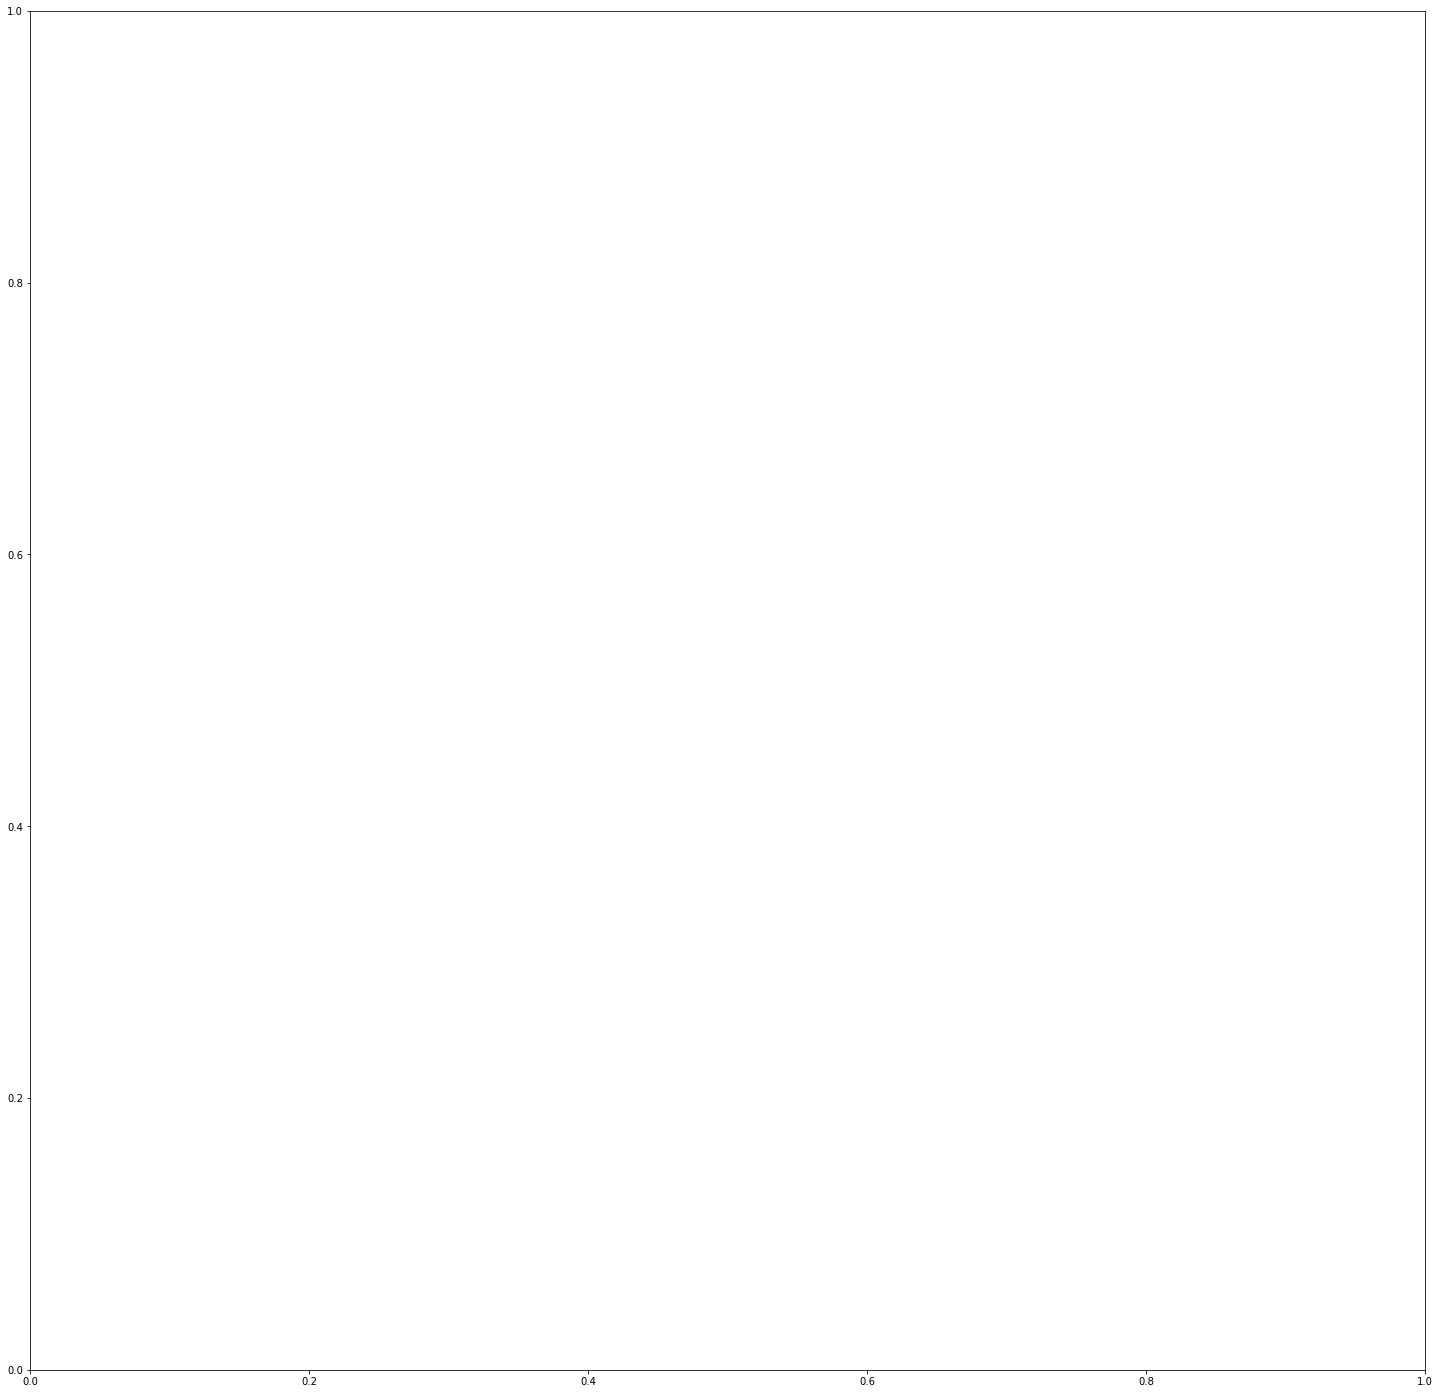

In [105]:
all_weights=[]
for (node1,node2,data) in net_golfo.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness

nodes_color=[]
for (node1,data) in net_golfo.nodes(data=True):
        nodes_color.append(data['color']) #we'll use this when determining edge thickness


unique_weights = list(set(all_weights))

random.seed(123)
pos = nx.spring_layout(net_golfo,k=0.4,seed=123)

for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in net_golfo.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(net_golfo,pos,edgelist=weighted_edges,width=width)


nx.draw_networkx_nodes(net_golfo,pos,node_color=nodes_color, node_size=4000)

nx.draw_networkx_labels(net_golfo,pos,font_size=10, font_family="sans-serif")

#plt.axis('off')
plt.rcParams["figure.figsize"] = (25,25)
#plt.show()

pass

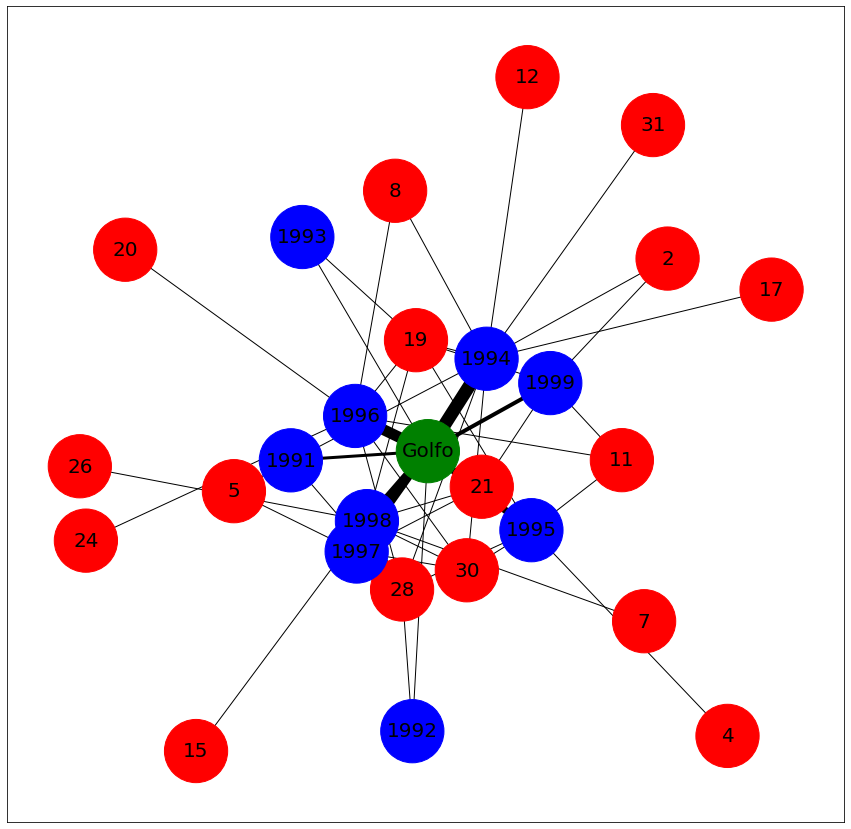

In [11]:
net_zetas = nx.Graph()

state_year = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/state_year_Golfo_G9000.txt')

for i in state_year.A.unique():
    name = str(i)
    net_zetas.add_node(name, color = 'red')

for i in state_year.B.unique():
    name = str(i)
    net_zetas.add_node(name, color = 'blue')

net_zetas.add_node('Golfo', color = 'green')

#-----------
x = df_G9000.values.tolist()
#-----------------------

for i in range(len(x)):
    edge = x[i]
    add = -1

    for o in range(len(edge)):
        add = add + 1
        
        if add == 0:
            A = edge[add]
            
        elif add == 1:
            B = edge[add]
            
        else:
            W = edge[add]
    net_zetas.add_edge(str(A), str(B) ,weight=int(W))
    

all_weights=[]
for (node1,node2,data) in net_zetas.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness

nodes_color=[]
for (node1,data) in net_zetas.nodes(data=True):
        nodes_color.append(data['color']) #we'll use this when determining edge thickness


unique_weights = list(set(all_weights))

pos = nx.spring_layout(net_zetas)

for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in net_zetas.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(net_zetas,pos,edgelist=weighted_edges,width=width)


nx.draw_networkx_nodes(net_zetas,pos,node_color=nodes_color, node_size=4000)

nx.draw_networkx_labels(net_zetas,pos,font_size=20, font_family="sans-serif")

#plt.axis('off')
plt.rcParams["figure.figsize"] = (15,15)
#plt.show()

pass

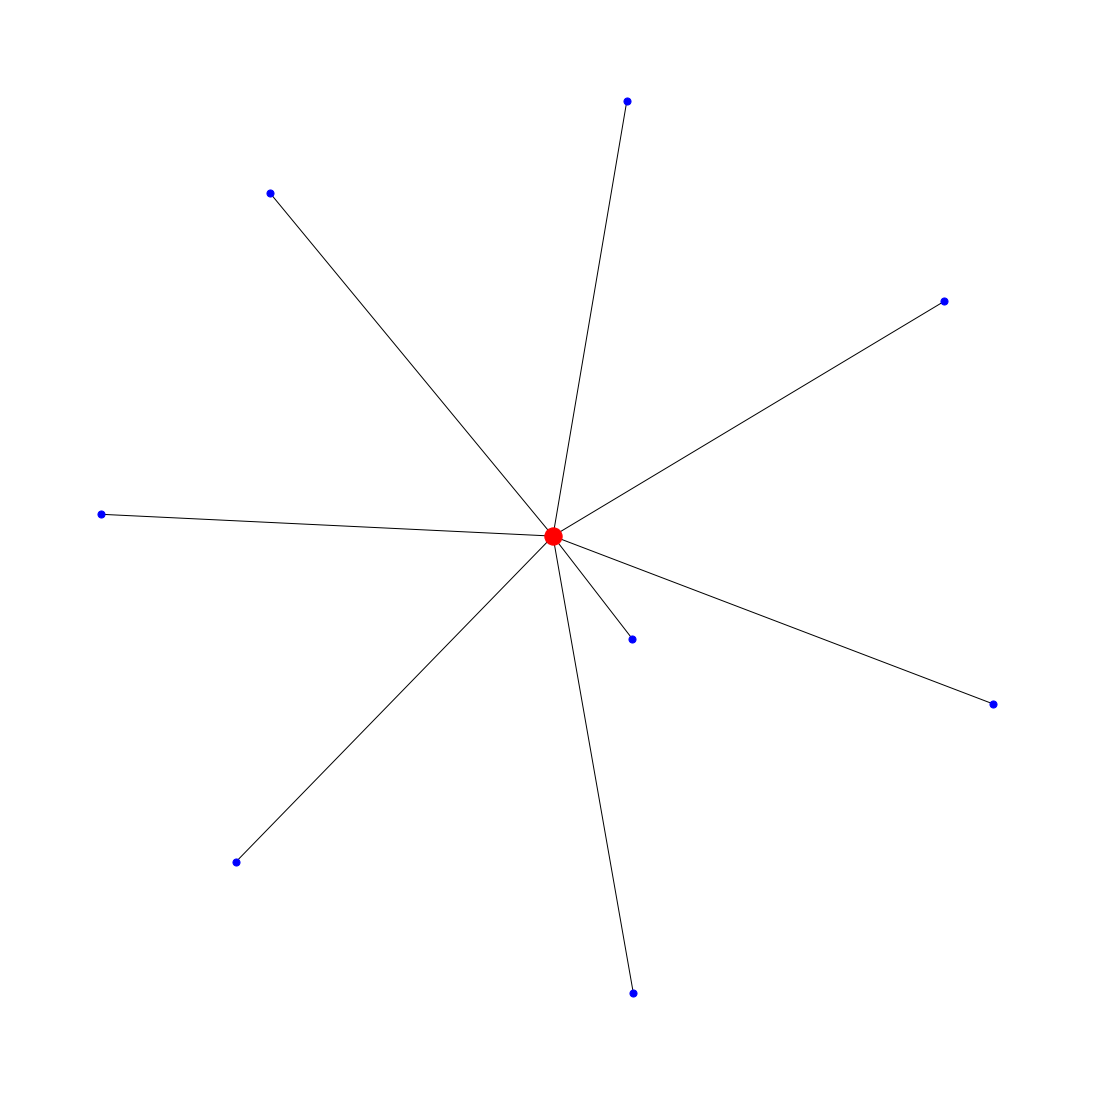

In [44]:
from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx

node_and_degree = net_zetas.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(net_zetas, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego, seed=2410)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

## NETWORK FAMIGLIE

In [33]:
y_1992 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1992','network_cartels_1992',1992)
y_1993 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1993','network_cartels_1993',1993)
y_1994 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1994','network_cartels_1994',1994)
y_1995 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1995','network_cartels_1995',1995)
y_1996 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1996','network_cartels_1996',1996)
y_1997 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1997','network_cartels_1997',1997)
y_1998 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1998','network_cartels_1998',1998)
y_1999 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1999','network_cartels_1999',1999)

y_9000 = pd.concat([y_1992,y_1993,y_1994,y_1995,y_1996,y_1997,y_1998,y_1999])

y_2000 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2000','network_cartels_2000',2000)
y_2001 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2001','network_cartels_2001',2001)
y_2002 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2002','network_cartels_2002',2002)
y_2003 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2003','network_cartels_2003',2003)
y_2004 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2004','network_cartels_2004',2004)
y_2005 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2005','network_cartels_2005',2005)
y_2006 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2006','network_cartels_2006',2006)
y_2007 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2007','network_cartels_2007',2007)
y_2008 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2008','network_cartels_2008',2008)
y_2009 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2009','network_cartels_2009',2009)
y_2010 = Edges_Only_Cartel_Network_Final(dta_0010,'network_cartels_2010','network_cartels_2010',2010)

y_0010 = pd.concat([y_2000,y_2001,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2008,y_2009,y_2010])



In [34]:
bi_grams_9000 = BiGram_Generator_Counter(y_9000)
bi_grams_0010 = BiGram_Generator_Counter(y_0010)

In [49]:
bi_grams_0010.sort_values(by='W',ascending=False)

,A,B,W
16,Golfo,Zetas,169
3,Golfo,Sinaloa,155
8,Sinaloa,Zetas,153
11,Beltran_Leyva,Sinaloa,133
15,Beltran_Leyva,Zetas,133
12,Beltran_Leyva,Golfo,130
1,Juarez,Sinaloa,117
4,Golfo,Juarez,112
18,Juarez,Zetas,105
0,Sinaloa,Tijuana,98


In [35]:
net_9000 = nx.Graph()
Network_Cartels_Meeting_Generator(bi_grams_9000,net_9000,'#0ee5ba')

net_0010 = nx.Graph()
Network_Cartels_Meeting_Generator(bi_grams_0010,net_0010,'#0ee5ba')

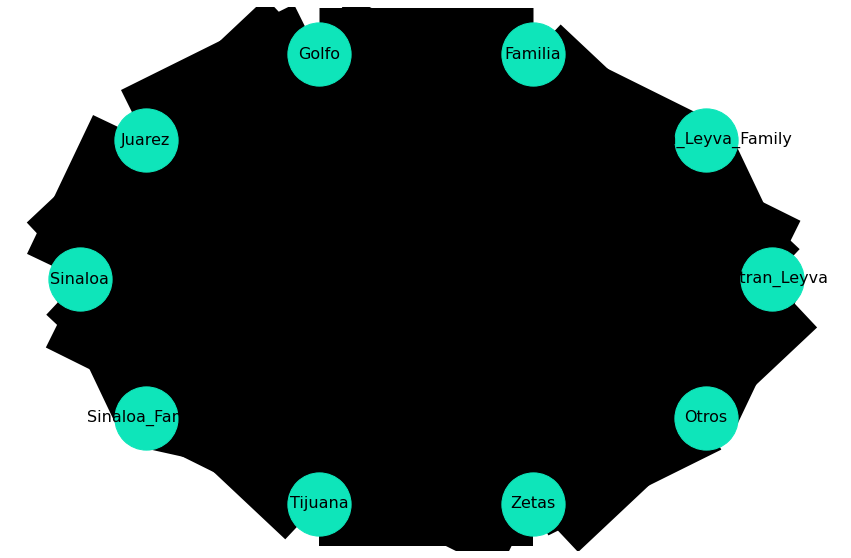

In [36]:
options = {
    "node_color" : '#0ee5ba', 
    "node_size" : 4000,
    "font_color" : 'black', 
    "font_size" : 16
}

pos=nx.circular_layout(net_0010)
all_weights=[]
for (node1,node2,data) in net_0010.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
unique_weights = list(set(all_weights))
for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in net_0010.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(net_0010,pos,edgelist=weighted_edges,width=width)
nx.draw(net_0010, pos, with_labels=True,**options)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [5]:
#CREAZIONE CARTELLA

import os

cartella = "GeeksforGeeks"
  
# Parent Directory path
percorso_cartella = "/Users/emanuele/Desktop/SNA/PROGETTO"

path = os.path.join(percorso_cartella, cartella)
os.mkdir(path)

print("La cartella '% s' è stata creata con successo" % cartella)

La cartella 'GeeksforGeeks' è stata creata con successo


In [38]:
metrics(net_0010)

-> I link della rete sono: 45

-> Calcolo il degree di ogni singolo nodo della rete:
il nodo Beltran_Leyva ha degree: 9
il nodo Beltran_Leyva_Family ha degree: 9
il nodo Familia ha degree: 9
il nodo Golfo ha degree: 9
il nodo Juarez ha degree: 9
il nodo Sinaloa ha degree: 9
il nodo Sinaloa_Family ha degree: 9
il nodo Tijuana ha degree: 9
il nodo Zetas ha degree: 9
il nodo Otros ha degree: 9

La somma dei node degree è: 90

L'average degree di questa network è: 9.0

-> Densità della rete equivale a: 1.0

-> MATRICE DI ADIACENZA PESATA
